In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load data
df = pd.read_csv('../data/dynamic_pricing_dataset.csv')

# Display basic information
print("Dataset Info:")
df.info()

# Handle 'None' values in Accident_History
print("Accident_History value counts before handling 'None':")
print(df['Accident_History'].value_counts(dropna=True))
print("\nNull values:", df['Accident_History'].isnull().sum())

# Replace NaN with 'None' in Accident_History
df['Accident_History'] = df['Accident_History'].fillna('None')

print("\nAccident_History value counts after handling 'None':")
print(df['Accident_History'].value_counts())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Speed_kmh               5000 non-null   int64  
 1   Acceleration_ms2        5000 non-null   float64
 2   Braking_Pattern         5000 non-null   object 
 3   Distance_Driven_km      5000 non-null   int64  
 4   Location_History        5000 non-null   object 
 5   Vehicle_Make            5000 non-null   object 
 6   Vehicle_Model           5000 non-null   object 
 7   Vehicle_Year            5000 non-null   int64  
 8   Safety_Features         5000 non-null   object 
 9   Past_Claims             5000 non-null   int64  
 10  Previous_Policy_Lapses  5000 non-null   int64  
 11  Accident_History        1516 non-null   object 
 12  Road_Conditions         5000 non-null   object 
 13  Weather_Data            5000 non-null   object 
 14  Traffic_Congestion      50

In [5]:
# Display categorical columns info
categorical_cols = [ 
    'Safety_Features', 
    'Policy_Type',
    'Braking_Pattern',
    'Location_History',
    'Vehicle_Make',
    'Vehicle_Model',
    'Accident_History',
    'Road_Conditions',
    'Weather_Data',
    'Traffic_Congestion'
]
print("Categorical Columns Value Counts:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Categorical Columns Value Counts:

Safety_Features:
Safety_Features
Standard    2529
Basic       1478
Advanced     993
Name: count, dtype: int64

Policy_Type:
Policy_Type
Pay-As-You-Drive    1681
Comprehensive       1667
Third-Party         1652
Name: count, dtype: int64

Braking_Pattern:
Braking_Pattern
Smooth      3000
Moderate    1500
Harsh        500
Name: count, dtype: int64

Location_History:
Location_History
Highway     1255
Suburban    1252
Rural       1251
Urban       1242
Name: count, dtype: int64

Vehicle_Make:
Vehicle_Make
BMW          749
Chevrolet    743
Tesla        732
Mercedes     706
Ford         703
Toyota       701
Honda        666
Name: count, dtype: int64

Vehicle_Model:
Vehicle_Model
Convertible    845
Coupe          845
Truck          835
Hatchback      826
SUV            825
Sedan          824
Name: count, dtype: int64

Accident_History:
Accident_History
None     3484
Minor    1029
Major     487
Name: count, dtype: int64

Road_Conditions:
Road_Conditions
Good  

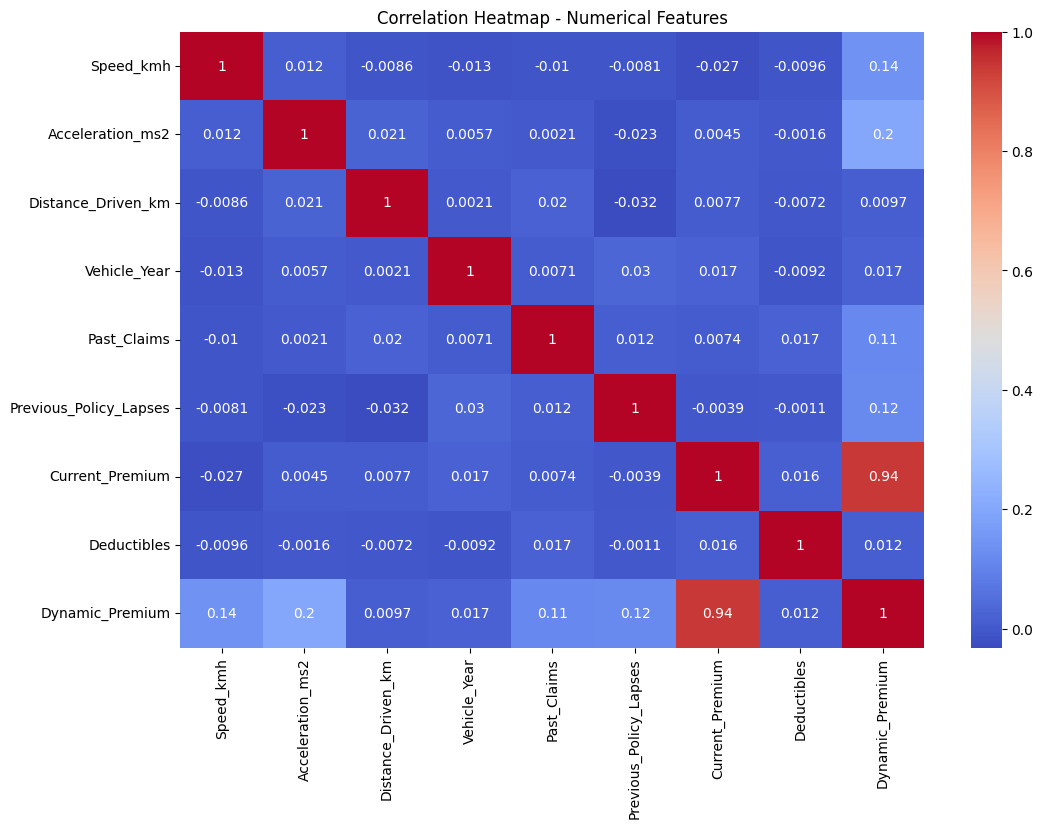

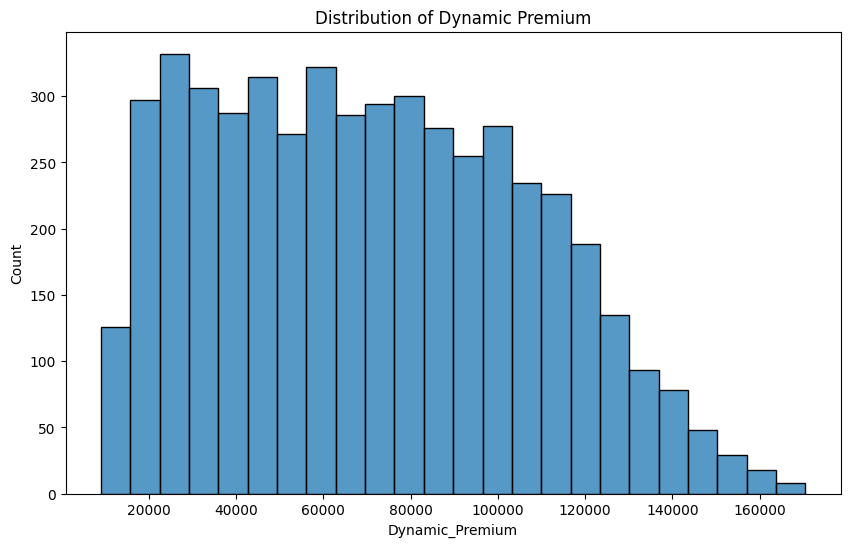

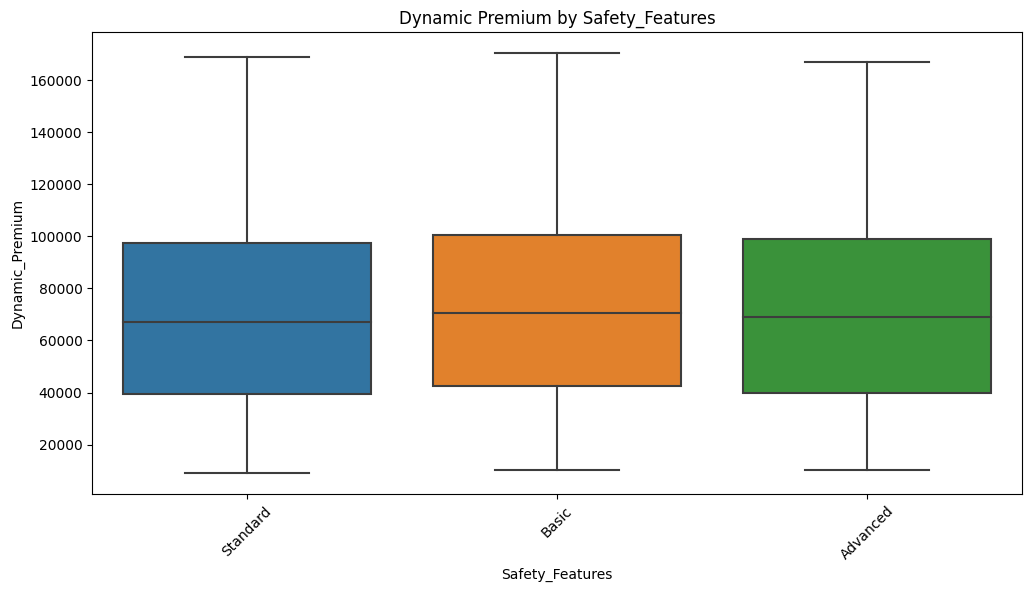

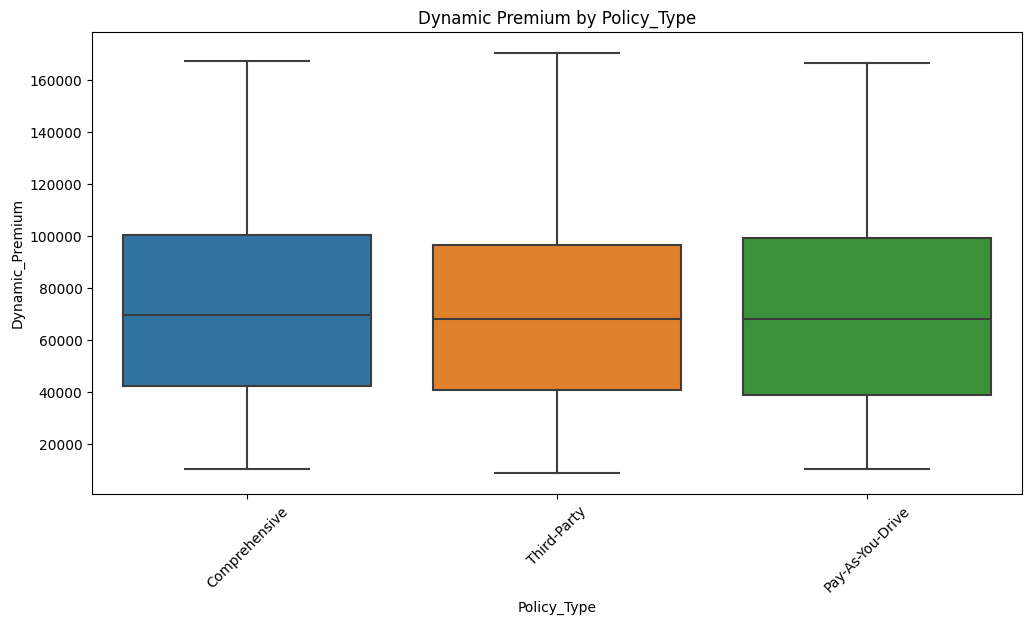

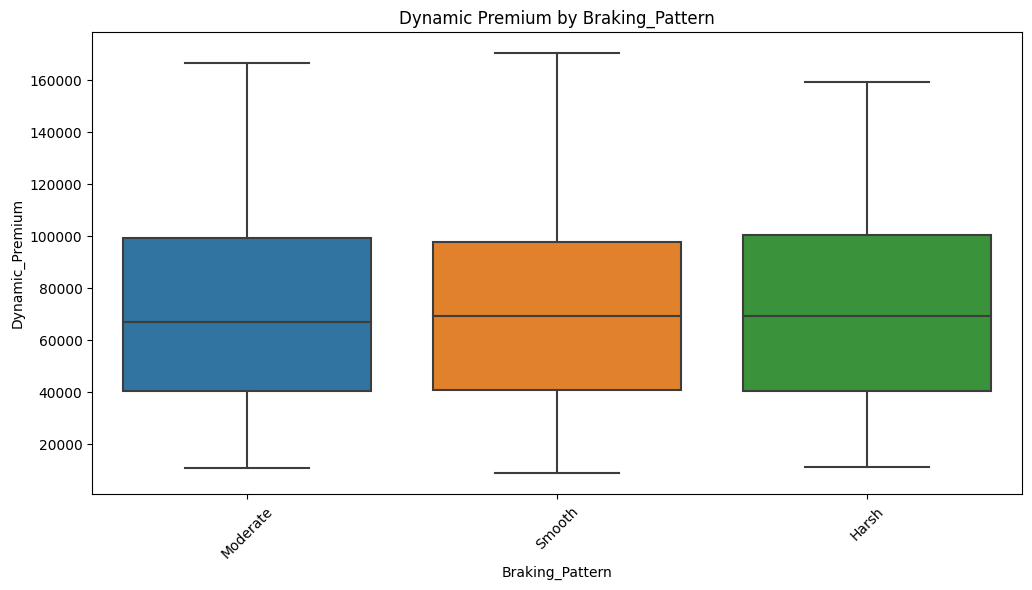

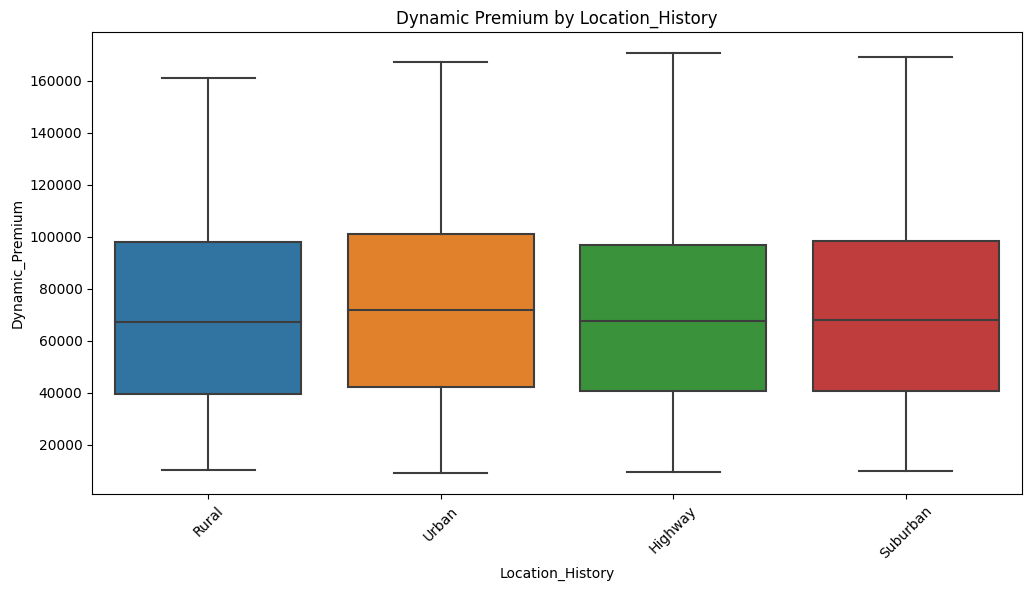

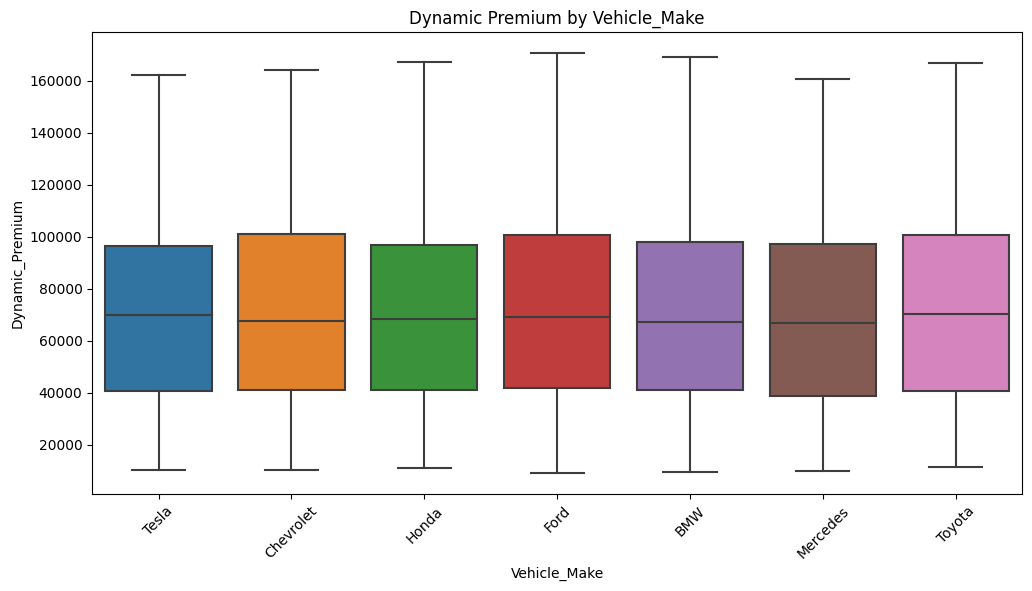

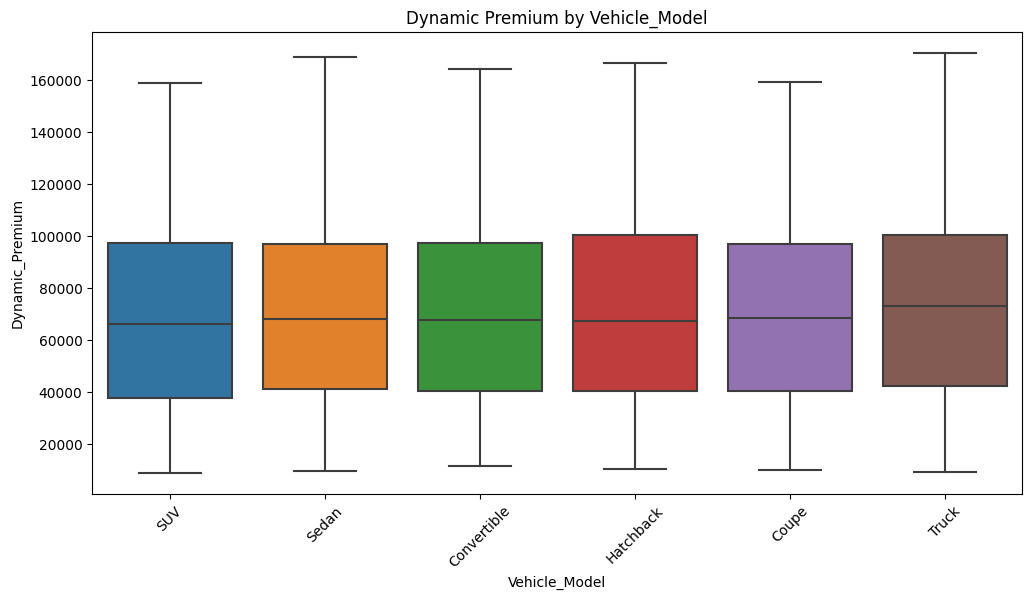

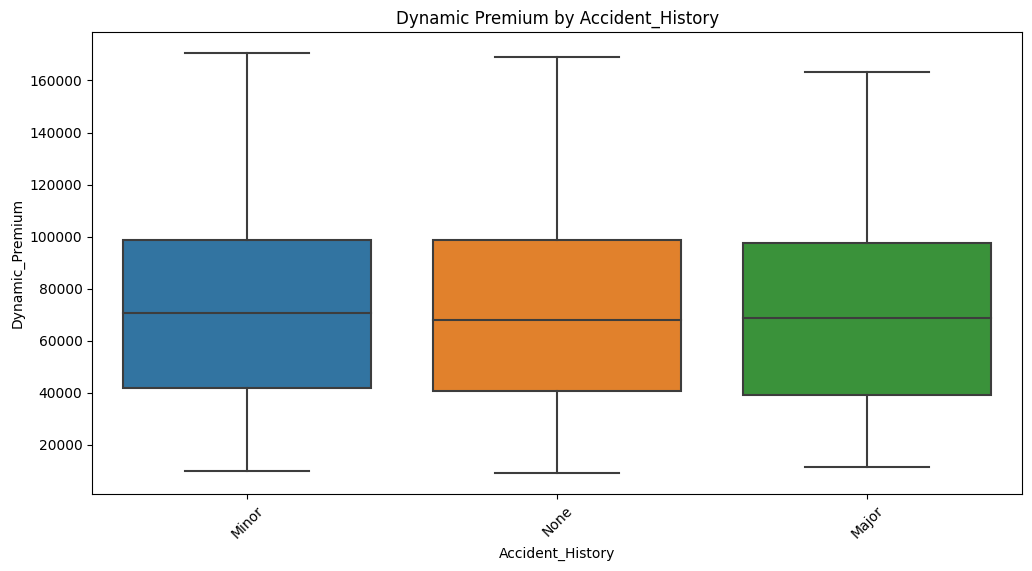

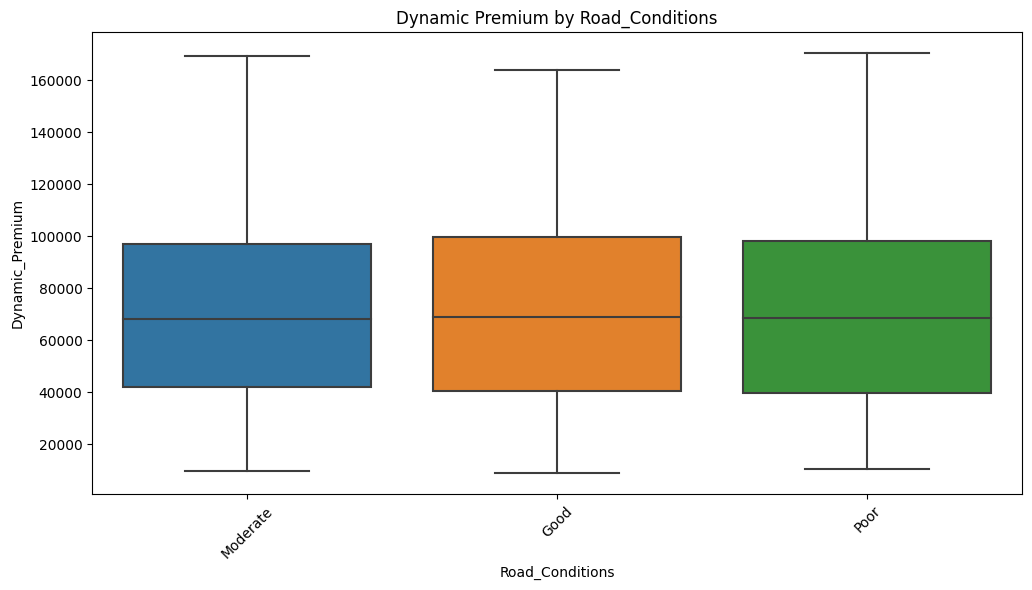

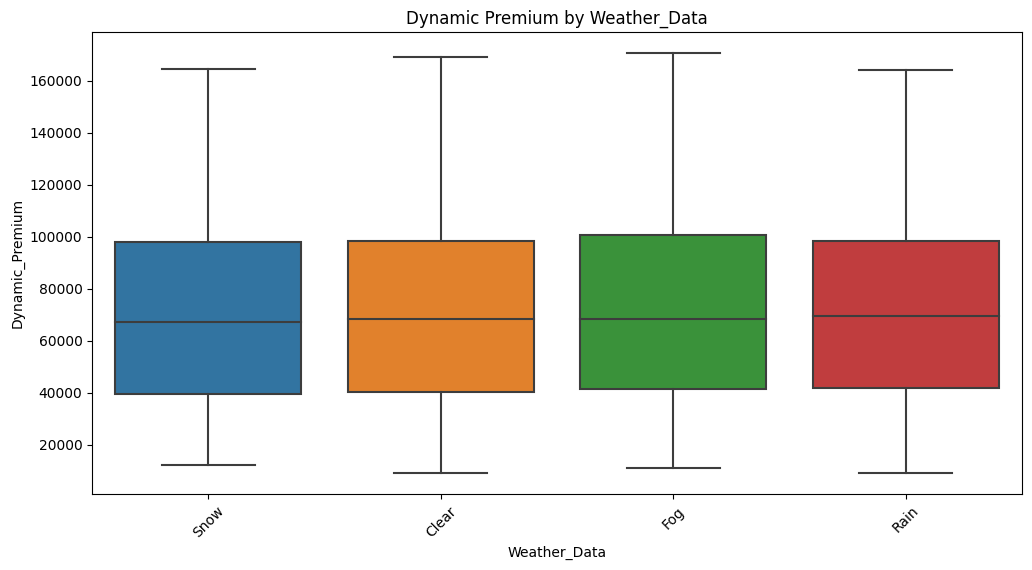

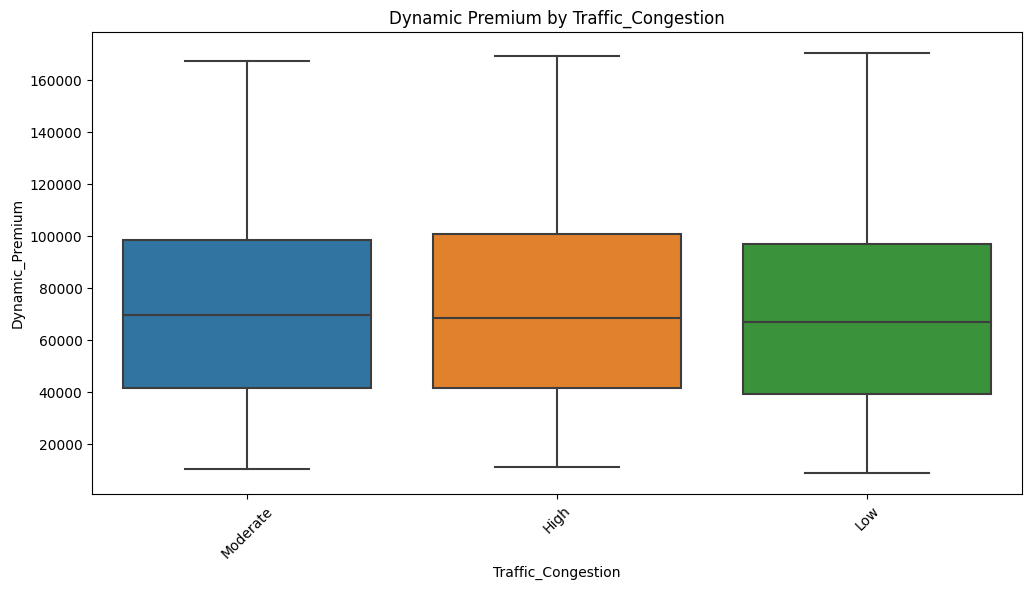

In [6]:
# Correlation heatmap for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Numerical Features')
plt.show()

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Dynamic_Premium'])
plt.title('Distribution of Dynamic Premium')
plt.show()

# Box plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='Dynamic_Premium', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Dynamic Premium by {col}')
    plt.show()

In [7]:
print("Preprocessing Steps:")

# 1. Handle categorical variables
print("\n1. Categorical Variables Encoding:")
df_processed = df.copy()

# Option 1: Label Encoding
le = LabelEncoder()
df_label_encoded = df_processed.copy()
for col in categorical_cols:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
print("\nLabel Encoded Data Sample:")
print(df_label_encoded[categorical_cols].head())

# Option 2: One-Hot Encoding
df_onehot = pd.get_dummies(df_processed, columns=categorical_cols)
print("\nOne-Hot Encoded Features:")
print(f"Original features: {df.shape[1]}")
print(f"After one-hot encoding: {df_onehot.shape[1]}")

Preprocessing Steps:

1. Categorical Variables Encoding:

Label Encoded Data Sample:
   Safety_Features  Policy_Type  Braking_Pattern  Location_History  \
0                2            0                1                 1   
1                2            2                2                 3   
2                2            0                2                 3   
3                2            1                1                 1   
4                1            2                2                 0   

   Vehicle_Make  Vehicle_Model  Accident_History  Road_Conditions  \
0             5              3                 1                1   
1             1              4                 2                0   
2             3              0                 2                2   
3             2              3                 2                1   
4             0              2                 2                0   

   Weather_Data  Traffic_Congestion  
0             3                   2  
1  

In [9]:
# Check for outliers in numerical columns
print("\n2. Outlier Analysis:")
numerical_cols = ['Speed_kmh','Acceleration_ms2','Distance_Driven_km', 'Vehicle_Year','Past_Claims','Previous_Policy_Lapses','Current_Premium', 'Deductibles','Dynamic_Premium']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"\n{col} outliers: {len(outliers)}")


2. Outlier Analysis:

Speed_kmh outliers: 0

Acceleration_ms2 outliers: 0

Distance_Driven_km outliers: 0

Vehicle_Year outliers: 0

Past_Claims outliers: 0

Previous_Policy_Lapses outliers: 0

Current_Premium outliers: 0

Deductibles outliers: 0

Dynamic_Premium outliers: 0


In [10]:
# Feature scaling analysis
print("\n3. Feature Scaling Analysis:")
print("Numerical features statistics:")
print(df[numerical_cols].describe())

# Feature importance with correlation to target
print("\n4. Correlation with Target Variable:")
correlations = df_label_encoded.corr()['Dynamic_Premium'].sort_values(ascending=False)
print(correlations)

# Save preprocessed data
df_onehot.to_csv('../data/preprocessed_data.csv', index=False)
print("\nPreprocessed data saved to '../data/preprocessed_data.csv'")


3. Feature Scaling Analysis:
Numerical features statistics:
         Speed_kmh  Acceleration_ms2  Distance_Driven_km  Vehicle_Year  \
count  5000.000000       5000.000000         5000.000000   5000.000000   
mean     74.133800          2.250280        15270.161200   2011.540200   
std      26.047495          1.013728         8498.350158      6.965435   
min      30.000000          0.500000          504.000000   2000.000000   
25%      52.000000          1.360000         7969.250000   2005.000000   
50%      74.000000          2.250000        15039.000000   2012.000000   
75%      97.000000          3.120000        22780.750000   2018.000000   
max     119.000000          4.000000        29997.000000   2023.000000   

       Past_Claims  Previous_Policy_Lapses  Current_Premium  Deductibles  \
count  5000.000000             5000.000000      5000.000000  5000.000000   
mean      1.991400                1.002600     27446.605600  2755.328400   
std       1.406884                0.819468  